In [22]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

In [23]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

u = [213, 0]

In [24]:
def response(t, z):
    Vx, Vy, Theta, Thetap = z

    dVx = 1/M*(-M*g*np.cos(Theta)+u[0]*np.cos(u[1])+ (1/2 * dar * Cd*(np.pi * (Df/2)**2 + Df * L * np.sqrt((np.sin(Theta))**2)) * (np.cos(Theta)*Vx + Vy*np.sin(Theta))**2)*np.cos(Theta))
    dVy = 1/M*(-M*g*np.sin(Theta)-u[0]*np.sin(u[1])+ (1/2 * dar * Cd*(np.pi * (Df/2)**2 + Df * L * np.sqrt((np.sin(Theta))**2)) * (np.cos(Theta)*Vx + Vy*np.sin(Theta))**2)*np.sin(Theta))
    dTheta = Thetap
    dThetap = 1/Izz*(-u[0]*Xcm*np.sin(u[1])+ (1/2*dar*Cd*(np.pi*(Df/2)**2 + Df*L*np.sqrt((np.sin(Theta))**2))*(np.cos(Theta)*Vx + Vy*np.sin(Theta))**2)*Xpe*np.sin(Theta))

    return [dVx, dVy, dTheta, dThetap]

In [25]:
# Condições iniciais para o cenário C1
z0 = [-10, 0, -0.01, 1]

# Tempo de simulação
t_span = [0, 4]  # de 0 a 10 segundos

solution = solve_ivp(response, t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))

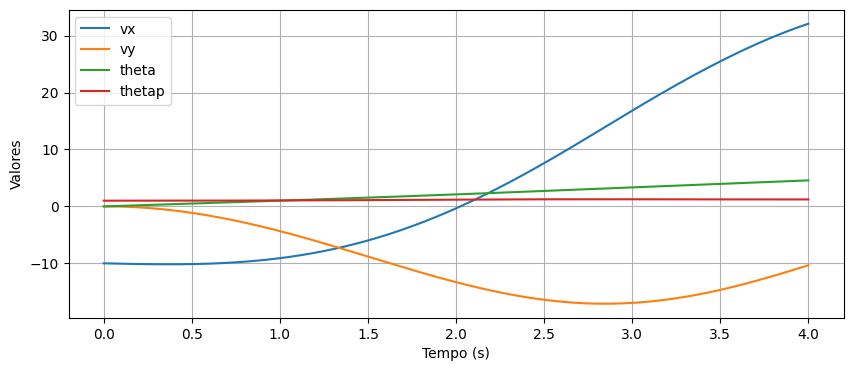

In [26]:
plt.figure(figsize=(10, 4))

plt.plot(solution.t, solution.y[0], label='vx')
plt.plot(solution.t, solution.y[1], label='vy')
plt.plot(solution.t, solution.y[2], label='theta')
plt.plot(solution.t, solution.y[3], label='thetap')

plt.xlabel('Tempo (s)')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()